In [1]:
#%%capture
#!pip install pgmpy
#!pip install git+https://github.com/CavenaghiEmanuele/pgmpy

In [4]:
import networkx as nx
import pylab as plt

import warnings
warnings.filterwarnings("ignore")

# **Build Causal Graph and CPTs**

StopIteration: 

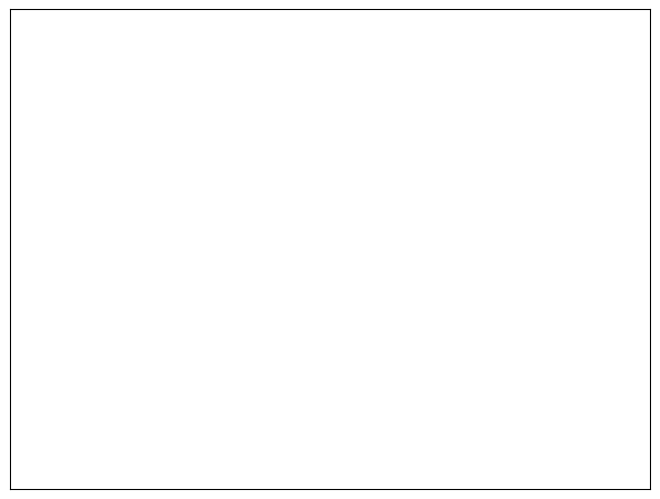

In [12]:
# https://pgmpy.org/models/bayesiannetwork.html
G = BayesianNetwork([('X','Y')])
#G.add_nodes_from(['X', 'Y', 'price'])
#G.add_edge('X', 'Y')
#G.add_edge('price', 'X')
#G.add_edge('price', 'Y')

G.get_random_cpds(n_states=2, inplace=True)

nx.draw(G, with_labels=True)
plt.show()

In [ ]:
for cpd in G.get_cpds():
  print(cpd)

In [ ]:
data = G.simulate(n_samples=100000)
data

# **Inference**

In [ ]:
inference = CausalInference(model=G)
inference.estimate_ate('X', 'Y', data=data, estimand_strategy='smallest', estimator_type="linear")

In [ ]:
inference.get_all_backdoor_adjustment_sets('X', 'Y')
inference.estimate_ate(X='X', Y='Y', data=data, estimand_strategy=frozenset({}), estimator_type="linear")

In [ ]:
inference = CausalInference(model=G)
inference.estimate_ate('X', 'Y', data=data, estimand_strategy=frozenset({'price'}), estimator_type="linear")